In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
import numpy as np

#visualization libraries for graphing
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme()


In [2]:
chemin_fichier = 'C:\\Users\\douja\\OneDrive\\Desktop\\Formation Data Analyst\\Projets Fil Rouge_Data\\Données Projet Financement Participatif//Kickstarter Campaigns DataSet.csv'

df = pd.read_csv(chemin_fichier)

# Features Processing & Engineering

In [3]:
#le fichier que l'on va utiliser Kickstarter Campaigns DataSet.csv

df = df.drop(['Unnamed: 0','slug','name', 'creator_id','blurb','id'], axis = 1)
#on va compter les lignes en doubles
print("duplicates: ", df.duplicated().sum())
df.drop_duplicates(inplace=True, ignore_index=True)
# original row-length was 217245. check after removal of duplicates
print("length of dataset after removal of duplicates is ", len(df))

#supprimer les projets canceled et live du Dataset
df= df.loc[(df['status']=='successful') | (df['status']=='failed')]
print(df['status'].unique())


duplicates:  19527
length of dataset after removal of duplicates is  197718
['failed' 'successful']


In [4]:
import pandas as pd
from datetime import datetime


#
df['launched_at'] = pd.to_datetime(df['launched_at'], errors='coerce')

# Vérifier les valeurs de date invalides


# Extraire le jour de la semaine
df['day_of_week'] = df['launched_at'].dt.strftime('%A')

# Afficher le DataFrame modifié

df.head()

,currency,launched_at,backers_count,country,deadline,status,usd_pledged,sub_category,main_category,blurb_length,goal_usd,city,duration,day_of_week
0,CAD,2018-02-10 22:47:52,16,CA,2018-04-11 21:47:52,failed,577.902078,food,Farms,122,785.82065,Victoria,60.0,Saturday
1,USD,2014-11-21 10:42:26,7,US,2014-12-15 10:42:26,successful,211.000000,publishing,Academic,35,93.00000,San Diego,24.0,Friday
2,USD,2020-10-19 05:26:59,99,US,2020-11-18 05:26:59,successful,4697.000000,food,Small Batch,122,1500.00000,Philadelphia,30.0,Monday
3,USD,2019-05-29 16:01:34,3,US,2019-07-28 16:01:34,failed,222.000000,technology,Gadgets,69,25000.00000,Chicago,60.0,Wednesday
4,USD,2015-11-19 20:36:01,100,US,2015-12-19 20:36:01,successful,5410.000000,publishing,Radio & Podcasts,131,5000.00000,Madrid,30.0,Thursday


In [5]:
#Features Preprocessing
from datetime import datetime

df['launched_at'] = pd.to_datetime(df['launched_at'], format='%Y-%m-%d %H:%M')

#df['launched_at'] = df['launched_at'].apply(lambda df: pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M'))

import calendar
df['month'] = df['launched_at'].dt.month
df['year'] = df['launched_at'].dt.year
# Remplacer les mois numériques par les noms des mois
df['month'] = df['month'].apply(lambda x: calendar.month_name[x])
df.head(1)

,currency,launched_at,backers_count,country,deadline,status,usd_pledged,sub_category,main_category,blurb_length,goal_usd,city,duration,day_of_week,month,year
0,CAD,2018-02-10 22:47:52,16,CA,2018-04-11 21:47:52,failed,577.902078,food,Farms,122,785.82065,Victoria,60.0,Saturday,February,2018


In [6]:
columns={"usd_pledged": "Pledged",
          "backers_count": "Backers",
         "goal_usd": "Goal",
         "sub_category": "Category",
         "main_category": "sub_category"
        }

df.rename(columns=columns, inplace=True)
df.head()

,currency,launched_at,Backers,country,deadline,status,Pledged,Category,sub_category,blurb_length,Goal,city,duration,day_of_week,month,year
0,CAD,2018-02-10 22:47:52,16,CA,2018-04-11 21:47:52,failed,577.902078,food,Farms,122,785.82065,Victoria,60.0,Saturday,February,2018
1,USD,2014-11-21 10:42:26,7,US,2014-12-15 10:42:26,successful,211.000000,publishing,Academic,35,93.00000,San Diego,24.0,Friday,November,2014
2,USD,2020-10-19 05:26:59,99,US,2020-11-18 05:26:59,successful,4697.000000,food,Small Batch,122,1500.00000,Philadelphia,30.0,Monday,October,2020
3,USD,2019-05-29 16:01:34,3,US,2019-07-28 16:01:34,failed,222.000000,technology,Gadgets,69,25000.00000,Chicago,60.0,Wednesday,May,2019
4,USD,2015-11-19 20:36:01,100,US,2015-12-19 20:36:01,successful,5410.000000,publishing,Radio & Podcasts,131,5000.00000,Madrid,30.0,Thursday,November,2015


In [7]:
data = df[['currency','country','city','Category','sub_category','day_of_week', 'month', 'year','blurb_length','Goal','duration','status']]

data.head()

,currency,country,city,Category,sub_category,day_of_week,month,year,blurb_length,Goal,duration,status
0,CAD,CA,Victoria,food,Farms,Saturday,February,2018,122,785.82065,60.0,failed
1,USD,US,San Diego,publishing,Academic,Friday,November,2014,35,93.00000,24.0,successful
2,USD,US,Philadelphia,food,Small Batch,Monday,October,2020,122,1500.00000,30.0,successful
3,USD,US,Chicago,technology,Gadgets,Wednesday,May,2019,69,25000.00000,60.0,failed
4,USD,US,Madrid,publishing,Radio & Podcasts,Thursday,November,2015,131,5000.00000,30.0,successful


In [8]:
# Encodage de la variable city
city_counts = data['city'].value_counts()
top_10_cities = city_counts.nlargest(10).index

data['city'] = data['city'].str.strip()

# Remplacer les noms de villes qui ne font pas partie des top 10 villes par "Other"
data['city'] = data['city'].apply(lambda x: x if x in top_10_cities else 'Other')

# Appliquer get_dummies() à la colonne 'city' modifiée
dummy_city_columns = pd.get_dummies(data['city'], prefix='city')

# Supprimer la colonne 'city_Other'
dummy_city_columns = dummy_city_columns.drop(['city_Other'], axis=1)

C:\Users\douja\AppData\Local\Temp\ipykernel_3420\131168419.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['city'] = data['city'].str.strip()
C:\Users\douja\AppData\Local\Temp\ipykernel_3420\131168419.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['city'] = data['city'].apply(lambda x: x if x in top_10_cities else 'Other')


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

#Identification des features et target

In [10]:
features = data.drop(['status'], axis = 1)
target = data['status']
features.head()
target

0             failed
1         successful
2         successful
3             failed
4         successful
             ...    
197712    successful
197713        failed
197714        failed
197716    successful
197717    successful
Name: status, Length: 184899, dtype: object

In [11]:
cat_feat = ['currency','country','sub_category','Category','month','day_of_week']

cat_feat_dummies = pd.get_dummies(features[cat_feat])
cat_feat_dummies.head()

,currency_AUD,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,...,month_November,month_October,month_September,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [12]:
feats  = pd.concat([cat_feat_dummies, dummy_city_columns], axis=1)
feats = pd.concat([features[[ 'Goal', 'duration', 'blurb_length','year']], feats], axis=1)
feats.head()

,Goal,duration,blurb_length,year,currency_AUD,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,...,city_Atlanta,city_Brooklyn,city_Chicago,city_London,city_Los Angeles,city_New York,city_Portland,city_San Francisco,city_Seattle,city_Toronto
0,785.82065,60.0,122,2018,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,93.00000,24.0,35,2014,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1500.00000,30.0,122,2020,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,25000.00000,60.0,69,2019,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,5000.00000,30.0,131,2015,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
X_train, X_test,y_train, y_test = train_test_split(feats, target , test_size = 0.2, random_state =42 , stratify = target)


In [14]:
scaler = StandardScaler()

X_train[['Goal', 'duration', 'blurb_length', 'year']] = scaler.fit_transform(X_train[['Goal', 'duration', 'blurb_length', 'year']])
X_test[['Goal', 'duration', 'blurb_length', 'year']] = scaler.transform(X_test[['Goal', 'duration', 'blurb_length', 'year']])

X_train.head()

,Goal,duration,blurb_length,year,currency_AUD,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,...,city_Atlanta,city_Brooklyn,city_Chicago,city_London,city_Los Angeles,city_New York,city_Portland,city_San Francisco,city_Seattle,city_Toronto
178942,-0.036008,2.223963,0.389319,0.261613,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
168034,-0.034547,-0.241326,0.793243,-0.556414,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
110309,-0.031415,-0.816559,-0.384870,0.261613,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
100975,-0.021472,2.223963,0.793243,-0.965427,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21252,-0.031415,-0.816559,0.759583,-2.192468,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
X_train.head()

,Goal,duration,blurb_length,year,currency_AUD,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,...,city_Atlanta,city_Brooklyn,city_Chicago,city_London,city_Los Angeles,city_New York,city_Portland,city_San Francisco,city_Seattle,city_Toronto
178942,-0.036008,2.223963,0.389319,0.261613,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
168034,-0.034547,-0.241326,0.793243,-0.556414,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
110309,-0.031415,-0.816559,-0.384870,0.261613,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
100975,-0.021472,2.223963,0.793243,-0.965427,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21252,-0.031415,-0.816559,0.759583,-2.192468,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Encodage de la variable categorielle


y_train = y_train.replace(to_replace=['successful', 'failed'], value = [1,0])

y_test = y_test.replace(to_replace=['successful', 'failed'], value = [1,0])

y_test.head()

43522     0
30160     1
136343    1
115724    1
146824    1
Name: status, dtype: int64

In [17]:
y_test.head()

43522     0
30160     1
136343    1
115724    1
146824    1
Name: status, dtype: int64

# Entrainement des modèles

In [18]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [19]:
import time

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
import xgboost
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [20]:
models = {
    "LogisticRegression"          : LogisticRegression(random_state = 42),
    "DecisionTreeClassifier"      : DecisionTreeClassifier(random_state = 42),
    "RandomForestClassifier"      : RandomForestClassifier(random_state = 42),
    "AdaBoostClassifier"          : AdaBoostClassifier(random_state = 42),
    "XGBClassifier"               : XGBClassifier(random_state = 42),
    "GradientBoostingClassifier"  : GradientBoostingClassifier(random_state = 42),
    "SGDClassifier"               : SGDClassifier(random_state=42),
    "BaggingClassifier with XGB"  : BaggingClassifier(base_estimator=RandomForestClassifier(),random_state=42),
    "BaggingClassifier with RF"   : BaggingClassifier(base_estimator=XGBClassifier(),random_state=42),
    "KNN"                         : KNeighborsClassifier(5)
 
}


In [21]:
score_df = pd.DataFrame(columns=['Modèle', 'Accuracy','Rappel', 'Precision', 'F1_Score', 'Temps_Execution'])

In [22]:
for model_name, model in models.items():
    start_time = time.time()
    
    # Entraînez votre modèle ici
    model.fit(X_train, y_train)
    # Prédisez les valeurs
    y_pred = model.predict(X_test)
    
    # Calculez les métriques
    accuracy = model.score(X_test,y_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    end_time = time.time()
    execution_time = end_time - start_time
    
    # Ajoutez les résultats au DataFrame
    score_df = score_df.append({
        'Modèle': model_name,
        'Accuracy':accuracy,
        'Rappel': recall,
        'Precision': precision,
        'F1_Score': f1,
        'Temps_Execution': execution_time
    }, ignore_index=True)
score_df.head()

C:\Users\douja\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\douja\AppData\Local\Temp\ipykernel_3420\4292573964.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append({
C:\Users\douja\AppData\Local\Temp\ipykernel_3420\4292573964.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append({
C:\Users\douja\AppData\L

,Modèle,Accuracy,Rappel,Precision,F1_Score,Temps_Execution
0,LogisticRegression,0.767550,0.776247,0.820500,0.797760,7.766603
1,DecisionTreeClassifier,0.753083,0.793416,0.789548,0.791477,11.212002
2,RandomForestClassifier,0.804949,0.815256,0.848551,0.831570,80.999080
3,AdaBoostClassifier,0.761412,0.756192,0.825222,0.789201,32.734601
4,XGBClassifier,0.802677,0.804038,0.853387,0.827978,32.175229


# Résultats

In [24]:
data = score_df[['Modèle','Accuracy','Precision','Rappel','F1_Score','Temps_Execution']]
data.head(10)

,Modèle,Accuracy,Precision,Rappel,F1_Score,Temps_Execution
0,LogisticRegression,0.767550,0.820500,0.776247,0.797760,7.766603
1,DecisionTreeClassifier,0.753083,0.789548,0.793416,0.791477,11.212002
2,RandomForestClassifier,0.804949,0.848551,0.815256,0.831570,80.999080
3,AdaBoostClassifier,0.761412,0.825222,0.756192,0.789201,32.734601
4,XGBClassifier,0.802677,0.853387,0.804038,0.827978,32.175229
5,GradientBoostingClassifier,0.753894,0.751679,0.871068,0.806982,70.402000
6,SGDClassifier,0.754381,0.828374,0.736779,0.779897,2.385052
7,BaggingClassifier with XGB,0.808464,0.848625,0.822398,0.835306,566.414348
8,BaggingClassifier with RF,0.805300,0.856211,0.805641,0.830157,538.480678
9,KNN,0.745078,0.787734,0.778032,0.782853,182.988276


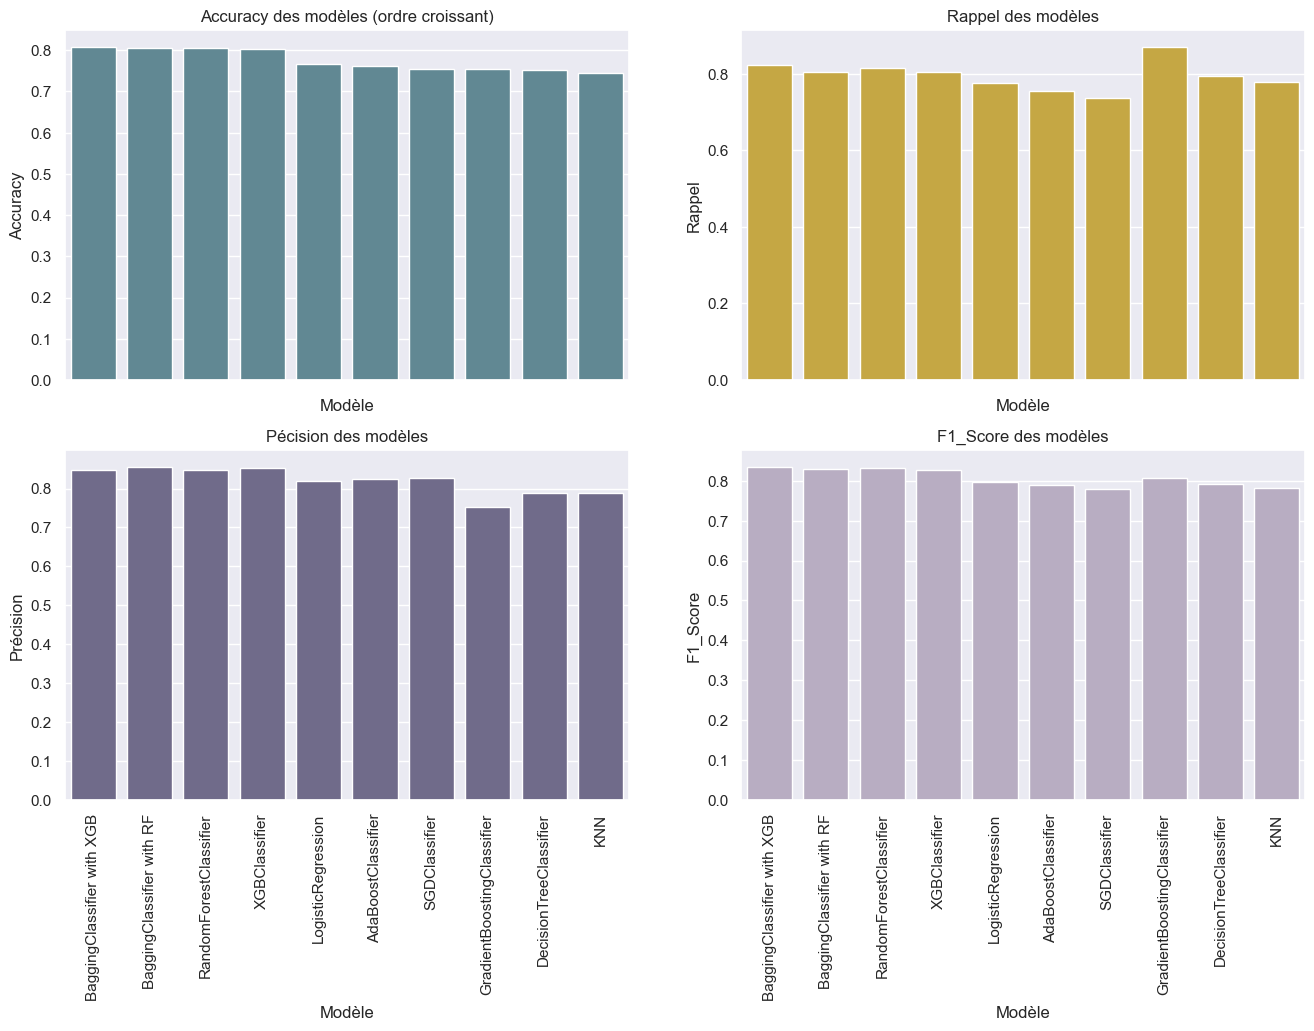

In [29]:
import seaborn as sns 
import matplotlib.pyplot as plt

# Triez les valeurs de la colonne "accuracy" dans l'ordre croissant
data_sorted = score_df.sort_values('Accuracy', ascending=False)
plt.figure(figsize=(16, 10))

plt.subplot(221)
# Affichez la barplot avec les valeurs triées
sns.barplot(x='Modèle', y='Accuracy', data=data_sorted, color = '#598D9B')

# Ajoutez des labels et un titre à la barplot

plt.ylabel('Accuracy')
plt.title('Accuracy des modèles (ordre croissant)')
plt.gca().set_xticklabels([]) 

# Affichez la barplot
plt.subplot(222)
# Affichez la barplot avec les valeurs triées Rappel	Précision	F1 Score	Temps d'exécution
sns.barplot(x='Modèle', y='Rappel', data=data_sorted, color = '#DAB22F')

# Ajoutez des labels et un titre à la barplot

plt.ylabel('Rappel')
plt.title('Rappel des modèles')
plt.gca().set_xticklabels([]) 

# Affichez la barplot
plt.subplot(223)
# Affichez la barplot avec les valeurs triées Rappel	Précision	F1 Score	Temps d'exécution

sns.barplot(x='Modèle', y='Precision', data=data_sorted, color = '#6C668F')

# Ajoutez des labels et un titre à la barplot
plt.xlabel('Modèle')
plt.ylabel('Précision')
plt.title('Pécision des modèles')
plt.xticks(rotation=90)
# Affichez la barplot

plt.subplot(224)
# Affichez la barplot avec les valeurs triées Rappel	Précision	F1 Score	Temps d'exécution
sns.barplot(x='Modèle', y='F1_Score', data=data_sorted, color = '#B8A9C6')

# Ajoutez des labels et un titre à la barplot
plt.xlabel('Modèle')
plt.ylabel('F1_Score')
plt.title('F1_Score des modèles')
plt.xticks(rotation=90)
plt.show()

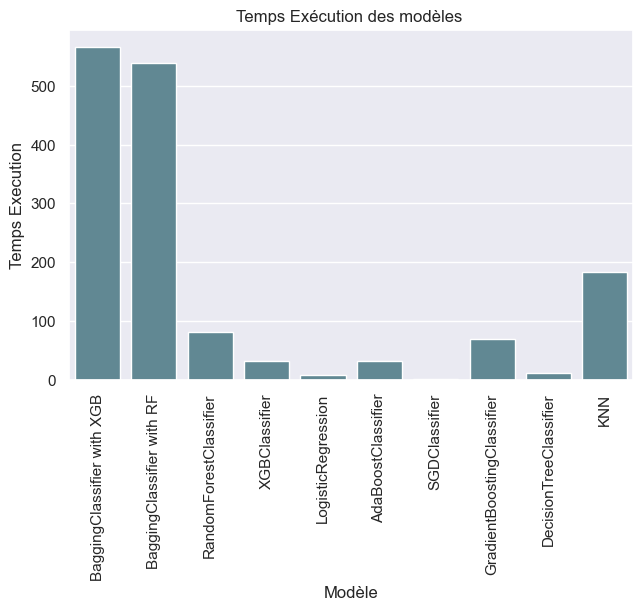

In [30]:
import seaborn as sns 
import matplotlib.pyplot as plt


plt.figure(figsize=(16, 10))

plt.subplot(221)
# Affichez la barplot avec les valeurs triées
sns.barplot(x='Modèle', y='Temps_Execution', data=data_sorted, color = '#598D9B')

# Ajoutez des labels et un titre à la barplot
plt.xlabel('Modèle')
plt.ylabel('Temps Execution')
plt.title('Temps Exécution des modèles ')

plt.xticks(rotation=90)
plt.show()

In [ ]:


# Affichez le DataFrame sous forme de tableau Markdown
print(data.to_markdown(index=False))


# Features Importances

In [ ]:
model = RandomForestClassifier(random_state = 42)
model.fit(X_train,y_train)
model.score(X_test,y_test)
importances = model.feature_importances_

# Obtenez les noms des caractéristiques
feature_names = X_train.columns

# Triez les importances dans l'ordre décroissant
indices = np.argsort(importances)[::-1]
# Sélectionnez les 10 premières caractéristiques
top_20_indices = indices[:20]
top_20_importances = importances[top_20_indices]
top_20_feature_names = feature_names[top_20_indices]

# Affichez les 10 premières caractéristiques et leurs importances
plt.figure(figsize=(8, 6))
plt.barh(range(20), top_20_importances,  color="#598D9B")
plt.yticks(range(20), top_20_feature_names)

plt.title("Top 20 des caractéristiques importantes dans le modèle Random Forest")
plt.xlabel("Importance")
plt.ylabel("Caractéristiques")
plt.show()

# Deep Learning

In [32]:
!pip install tensorflow

                                              0.0/284.2 MB ? eta -:--:--
                                              0.1/284.2 MB 2.6 MB/s eta 0:01:48
                                              0.3/284.2 MB 4.2 MB/s eta 0:01:08
                                              0.5/284.2 MB 4.3 MB/s eta 0:01:06
                                              0.8/284.2 MB 4.9 MB/s eta 0:00:58
                                              1.3/284.2 MB 6.9 MB/s eta 0:00:42
                                              2.0/284.2 MB 8.7 MB/s eta 0:00:33
                                              2.4/284.2 MB 8.6 MB/s eta 0:00:33
                                              3.2/284.2 MB 9.6 MB/s eta 0:00:30
                                             3.6/284.2 MB 10.1 MB/s eta 0:00:28
                                             4.4/284.2 MB 10.5 MB/s eta 0:00:27
                                             5.2/284.2 MB 11.4 MB/s eta 0:00:25
                                             5.

In [35]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report



# Création du modèle
model = keras.Sequential([
    keras.layers.Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation="sigmoid")
])

# Compiler le modèle
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Entraîner le modèle
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Évaluation du modèle
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))


Epoch 1/10
4623/4623 [==============================] - 18s 4ms/step - loss: 0.4471 - accuracy: 0.7631
Epoch 2/10
4623/4623 [==============================] - 17s 4ms/step - loss: 0.4061 - accuracy: 0.7857
Epoch 3/10
4623/4623 [==============================] - 17s 4ms/step - loss: 0.3981 - accuracy: 0.7898
Epoch 4/10
4623/4623 [==============================] - 16s 4ms/step - loss: 0.3957 - accuracy: 0.7921
Epoch 5/10
4623/4623 [==============================] - 16s 4ms/step - loss: 0.3924 - accuracy: 0.7943
Epoch 6/10
4623/4623 [==============================] - 17s 4ms/step - loss: 0.3894 - accuracy: 0.7963
Epoch 7/10
4623/4623 [==============================] - 17s 4ms/step - loss: 0.3877 - accuracy: 0.7968
Epoch 8/10
4623/4623 [==============================] - 17s 4ms/step - loss: 0.3857 - accuracy: 0.7985
Epoch 9/10
4623/4623 [==============================] - 16s 4ms/step - loss: 0.3848 - accuracy: 0.8000
Epoch 10/10
1156/1156 [==============================] - 3s 2ms/step
Accu

In [36]:
!pip install hyperopt

                                              0.0/1.6 MB ? eta -:--:--
     ---                                      0.2/1.6 MB 4.6 MB/s eta 0:00:01
     ----------                               0.4/1.6 MB 6.3 MB/s eta 0:00:01
     -------------------                      0.8/1.6 MB 8.3 MB/s eta 0:00:01
     ------------------------                 1.0/1.6 MB 7.8 MB/s eta 0:00:01
     ---------------------------------------  1.6/1.6 MB 10.0 MB/s eta 0:00:01
     ---------------------------------------- 1.6/1.6 MB 8.4 MB/s eta 0:00:00
                                              0.0/200.5 kB ? eta -:--:--
     ------------------------------------- 200.5/200.5 kB 11.9 MB/s eta 0:00:00


In [ ]:

from hyperopt import fmin, tpe, hp


# Définition de l'espace des hyperparamètres pour la recherche
space = {
    'num_units': hp.choice('num_units', [64, 128, 256]),
    'dropout_rate': hp.uniform('dropout_rate', 0.2, 0.5),
    'learning_rate': hp.loguniform('learning_rate', -5, -2)
}

# Fonction objectif pour la recherche d'hyperparamètres
def objective(params):
    model = keras.Sequential([
        keras.layers.Dense(params['num_units'], activation="relu", input_shape=(X_train.shape[1],)),
        keras.layers.Dropout(params['dropout_rate']),
        keras.layers.Dense(params['num_units'], activation="relu"),
        keras.layers.Dropout(params['dropout_rate']),
        keras.layers.Dense(1, activation="sigmoid")
    ])

    optimizer = keras.optimizers.Adam(learning_rate=params['learning_rate'])
    model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    y_pred = (model.predict(X_test) > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)

    return -accuracy  # Minimiser l'erreur de classification (maximiser la précision)

# Recherche d'hyperparamètres avec Hyperopt
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=20)

# Afficher les meilleurs hyperparamètres
print("Meilleurs hyperparamètres:")
print(best)


  0%|          | 0/20 [00:00<?, ?trial/s, best loss=?]

# KFold Validation

In [ ]:
k = 10
start_time_kf = time.time()



kf = KFold(n_splits=k, shuffle = True, random_state=42)

model = RandomForestClassifier(random_state=42)
result = cross_val_score(model , feats, target, cv = kf)

from sklearn.model_selection import cross_val_predict

predictions = cross_val_predict(model, feats, target, cv=kf)

end_time_kf = time.time()

print("Avg accuracy random forest with KFold: {}".format(result.mean()))
# Calcul du temps d'exécution pour le modèle Random Forest en secondes
execution_time_kf = end_time_kf - start_time_kf
print("Temps d'exécution random forest with KFold :", execution_time_kf, "secondes")

In [ ]:
from sklearn.metrics import classification_report
class_report = classification_report(target, predictions)

print("Classification Report for Random Forest with KFold:\n", class_report)

In [ ]:
k = 10
start_time_kf = time.time()



kf = KFold(n_splits=k, shuffle = True, random_state=42)

model = BaggingClassifier(random_state=42)

result = cross_val_score(model , feats, target, cv = kf)
end_time_kf = time.time()

print("Avg accuracy random forest with KFold: {}".format(result.mean()))
# Calcul du temps d'exécution pour le modèle Random Forest en secondes
execution_time_kf = end_time_kf - start_time_kf
print("Temps d'exécution random forest with KFold :", execution_time_kf, "secondes")

In [ ]:
k = 10
start_time_kf = time.time()



kf = KFold(n_splits=k, shuffle = True, random_state=42)

model = BaggingClassifier(base_estimator=XGBClassifier(),random_state=42)

result = cross_val_score(model , feats, target, cv = kf)
end_time_kf = time.time()

print("Avg accuracy random forest with KFold: {}".format(result.mean()))
# Calcul du temps d'exécution pour le modèle Random Forest en secondes
execution_time_kf = end_time_kf - start_time_kf
print("Temps d'exécution random forest with KFold :", execution_time_kf, "secondes")

In [ ]:
predictions = cross_val_predict(model, feats, target, cv=kf)
class_report = classification_report(target, predictions)

print("Classification Report for Random Forest with KFold:\n", class_report)

# Amélioration du modèle GridSearch

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time

# Définir les hyperparamètres à rechercher
param_grid = {
    'n_estimators': [50, 100, 200],       # Nombre d'arbres dans la forêt
    'max_depth': [None, 10, 20],          # Profondeur maximale de chaque arbre
    'min_samples_split': [2, 5, 10],      # Nombre minimum d'échantillons requis pour diviser un nœud
    'min_samples_leaf': [1, 2, 4],         # Nombre minimum d'échantillons requis à chaque nœud feuille
    'criterion': ['gini', 'entropy']
}

# Créer le modèle Random Forest
cl3 = RandomForestClassifier(random_state=42, n_jobs=-1)

# Utiliser GridSearchCV pour trouver les meilleurs hyperparamètres
grid_search = GridSearchCV(cl3, param_grid, cv=5, n_jobs=-1)
start_time_cl3 = time.time()
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres : ", grid_search.best_params_)

# Afficher l'accuracy score pour le train et le test avec les meilleurs hyperparamètres
print("Accuracy score du Random Forest pour train : ", grid_search.best_estimator_.score(X_train, y_train))
print("Accuracy score du Random Forest pour test  : ", grid_search.best_estimator_.score(X_test, y_test))

# Temps d'exécution du Random Forest avec les meilleurs hyperparamètres
print("Temps d'exécution du Random Forest         : {} secondes".format(time.time() - start_time_cl3))

# Prédire avec les meilleurs hyperparamètres
predictions3 = grid_search.best_estimator_.predict(X_test)